In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

<AxesSubplot:>

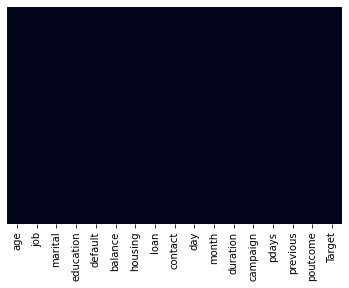

In [5]:
## check the null value
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [6]:
df['job']=df['job'].astype('category')  
df['marital']=df['marital'].astype('category') 
df['education']=df['education'].astype('category') 
df['default']=df['default'].astype('category') 
df['housing']=df['housing'].astype('category') 
df['loan']=df['loan'].astype('category') 
df['contact']=df['contact'].astype('category') 
df['month']=df['month'].astype('category') 
df['poutcome']=df['poutcome'].astype('category') 
#df['Target']=df['Target'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  object  
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


In [8]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [9]:
df=pd.get_dummies(df,columns=['job'])
df=pd.get_dummies(df,columns=['marital'])
df=pd.get_dummies(df,columns=['education'])
df=pd.get_dummies(df,columns=['default'])
df=pd.get_dummies(df,columns=['housing'])
df=pd.get_dummies(df,columns=['loan'])
df=pd.get_dummies(df,columns=['contact'])
df=pd.get_dummies(df,columns=['month'])
df=pd.get_dummies(df,columns=['poutcome'])
#df=pd.get_dummies(df,columns=['Target'])


In [10]:
df[:2]

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [11]:
df = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown','Target']]

In [12]:
df.head(2)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no


In [13]:
train = df.iloc[:, :51]
train[:2]

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [14]:
test = df.iloc[:, -1]
test[:2]

0    no
1    no
Name: Target, dtype: object

In [15]:
#train = train.drop(['job', 'marital', 'education', 'housing', 'month', 'poutcome', 'contact', 'default', 'loan'],axis=1)

In [16]:
test[:5]

0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object

In [17]:
train.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


In [18]:
train.isna().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


In [19]:
train.shape

(45211, 51)

In [20]:
test.head()

0    no
1    no
2    no
3    no
4    no
Name: Target, dtype: object

In [21]:
test.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [22]:
test1 = test .apply(lambda x: 0 if x == 'no' else 1)

In [23]:
test1.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [24]:
test1.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [25]:
## train test split
from sklearn.model_selection import train_test_split

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(train, test1, test_size=0.3, random_state=30)

In [27]:
#X_train[:2]

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
8875,39,518,4,608,2,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
34790,36,532,6,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [28]:
## apply tranformation standard scaler
from sklearn.preprocessing import StandardScaler

In [29]:
stds = StandardScaler()

In [62]:
X_train_std = stds.fit_transform(train)
#X_test_std = stds.fit_transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()

In [70]:
model.fit(train, test1)

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
std_prid = model.predict(train)

In [74]:
std_actul_pridict = pd.DataFrame({'Actual': test1, 'Predict': std_prid})

In [75]:
std_actul_pridict[:10]

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [76]:
std_actul_pridict.value_counts()

Actual  Predict
0       0          39135
1       0           4100
        1           1189
0       1            787
dtype: int64

In [77]:
model.score(X_test_std, y_test)

0.6134621055735772

In [78]:
model.coef_

array([[-2.05090589e-02,  2.10175768e-05, -1.18571020e-02,
         3.82761631e-03, -3.88611848e-01,  2.56866632e-03,
        -1.13227485e-01, -2.56564165e-02, -2.48928524e-01,
        -2.68993223e-02, -9.26067699e-03,  6.47243605e-03,
         1.63974960e-01, -1.61759570e-02, -8.75081849e-02,
         2.95522606e-02, -6.92939703e-02,  2.45307187e-03,
         2.20199023e-03,  1.63044400e-02, -1.71466850e-01,
        -1.23905923e-01, -6.91777580e-02, -2.68563354e-01,
         4.54951693e-02,  1.31776102e-02, -2.59100670e-01,
        -1.99676632e-02,  3.57979825e-01, -6.37048158e-01,
        -8.21709961e-02, -1.96897337e-01,  9.09329711e-02,
         4.95809823e-02, -4.19582286e-01,  4.31758185e-02,
         1.96696394e-02,  2.85297971e-02, -1.47451149e-02,
        -1.44164371e-02, -8.43236814e-02, -5.56907950e-02,
         8.64587144e-02, -4.03278274e-01, -5.64598018e-02,
         9.80210918e-02,  7.39907099e-02, -1.34147055e-01,
        -3.18583563e-02,  3.10040590e-01, -4.23103511e-0

In [79]:
from sklearn import metrics

In [80]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(test1, std_prid)

0.8919068368317444

## Confusion metrix

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
cm = confusion_matrix(test1, std_prid)

In [86]:
print(f'Confusion Matrix is:\n {cm}')

Confusion Matrix is:
 [[39135   787]
 [ 4100  1189]]


## Classification Report

In [87]:
from sklearn.metrics import classification_report

In [89]:
cr = classification_report(test1, std_prid)
print(f'Classification Report is \n {cr}')

Classification Report is 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

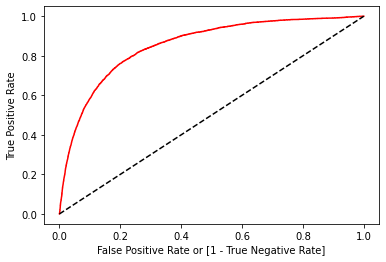

In [91]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(test1, model.predict_proba (train)[:,1])

auc = roc_auc_score(test, std_prid)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [92]:
auc

0.6025463801700137

## Robust 

In [93]:
from sklearn.preprocessing import RobustScaler

In [94]:
robust = RobustScaler()

In [99]:
X_train_robust = robust.fit_transform(train)
#X_test_robust = robust.fit_transform(X_test)

In [100]:
## build the logistic model
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression()

In [103]:
lr.fit(X_train_robust, test1)

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
robust_prid = lr.predict(X_train_robust)

In [106]:
robust_actual_pridict = pd.DataFrame({'Actual': test1, 'Pridict': robust_prid})

In [107]:
robust_actual_pridict[:10]

,Actual,Pridict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [108]:
lr.score(X_test_robust, y_test)

0.9002506635210852

In [109]:
lr.coef_

array([[ 8.27545563e-02, -1.43977824e-02,  2.00503007e-02,
         8.82458343e-01, -2.11531782e-01,  7.67507866e-04,
         2.85085735e-03, -1.83893158e-01, -5.42256528e-01,
        -2.46333759e-01, -2.21645957e-01, -2.82746668e-01,
         2.26556043e-01, -2.09918231e-01, -4.55554479e-01,
         2.24822963e-01, -4.06836338e-01, -1.71936681e-01,
        -3.60116278e-02, -3.48405212e-03, -1.80985486e-01,
         1.84469538e-01, -1.74551580e-01, -1.26097227e-02,
         1.39200599e-01,  4.79607035e-02,  7.10716960e-02,
        -7.10716960e-02,  3.27653052e-01, -3.27653052e-01,
         2.72221412e-01, -2.72221412e-01,  4.72513990e-01,
         2.86824361e-01, -7.59338351e-01, -1.04391289e-01,
        -8.06075597e-01,  1.34893639e-01, -2.62981004e-01,
        -5.47425116e-01, -8.16959696e-01,  1.46724611e-01,
         5.37816200e-01, -5.74307377e-01, -8.18731414e-01,
         4.46171134e-01,  3.59511487e-01, -6.44795322e-01,
        -2.52728136e-01,  1.49728672e+00, -5.99763260e-0

Text(0, 0.5, 'True Positive Rate')

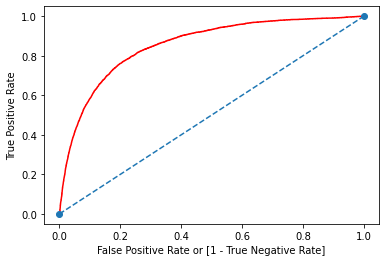

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(test1, model.predict_proba (train)[:,1])

auc = roc_auc_score(test1, robust_prid)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'o--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

